In [1]:
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
import folium
from folium.plugins import MarkerCluster
from folium.plugins import FastMarkerCluster

Let's load the Nashville zipcode data and look at the first few rows

In [21]:
bikeways = gpd.read_file('../data/bikeways_view/bikeways.shp')
bikeways.head()

,BikewayTyp,Status,OnStreetNa,FromStreet,ToStreetNa,YearComple,District,geometry
0,WOL,Complete,Broadway,3rd Ave S,1st Ave S,2011,19,"LINESTRING (1739913.579 666640.867, 1739440.87..."
1,BL,Complete,Division St,Buddy Killen Cir,Music Sq E,2004,19,"LINESTRING (1734705.966 663020.082, 1734702.44..."
2,PBL,Complete,12th Ave S,Lawrence Ave,Division St,2023,"17, 18, 19","LINESTRING (1736945.240 662599.313, 1736876.29..."
3,BL,Complete,Fort Negley Blvd,Chestnut St,Hamilton Ave,2014,17,"LINESTRING (1739441.150 659321.924, 1739389.44..."
4,SSR,Completed,Gale Ln,Belmont Blvd,975' SW of 8th Ave S,2024,"17, 18","LINESTRING (1739156.718 650393.902, 1739133.81..."


In [22]:
type(bikeways)

geopandas.geodataframe.GeoDataFrame

Now let's look at the difference between calling the first geometry variable....

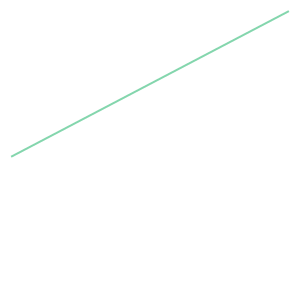

In [23]:
bikeways.loc[0, 'geometry']

In [24]:
print(bikeways.loc[0, 'geometry'])

LINESTRING (1739913.5791138858 666640.8672374785, 1739440.8756629676 666393.0419457257)


<Axes: >

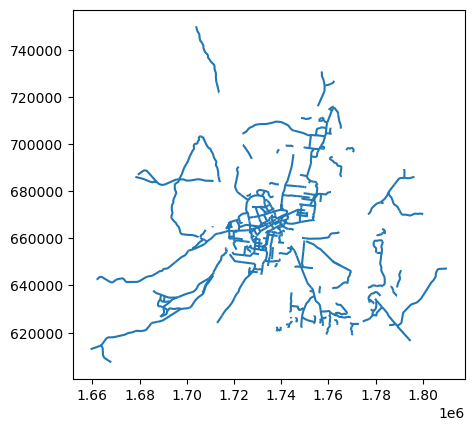

In [26]:
bikeways.plot()

Add information and styling

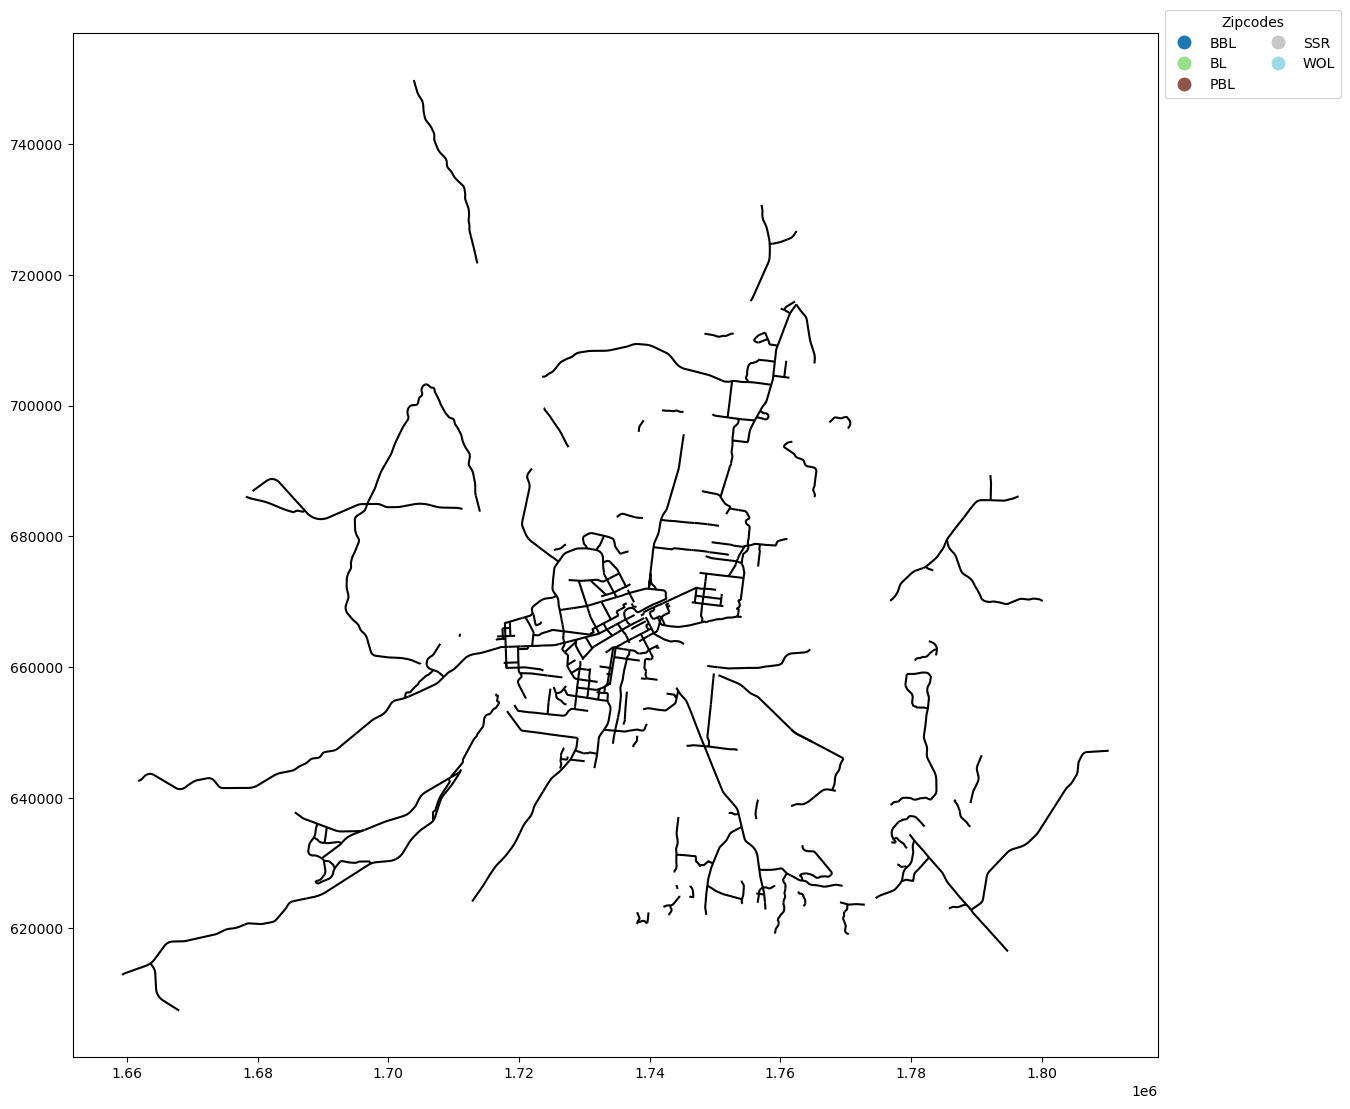

In [34]:
#geopandas will take care of legend styling if you pass a dict of keywords

leg_kwds = {'title': 'Zipcodes', 'loc': 'upper left', 
            'bbox_to_anchor': (1, 1.03), 'ncol': 2}

bikeways.plot(column = 'BikewayTyp', 
              figsize=(14, 14),
              edgecolor = 'black',
              legend = True, legend_kwds = leg_kwds, 
              cmap = 'tab20')
plt.show()

In [41]:
import folium

# Ensure correct CRS
if bikeways.crs is None:
    bikeways = bikeways.set_crs(epsg=4326)
else:
    bikeways = bikeways.to_crs(epsg=4326)

# Center map
center = [
    bikeways.geometry.centroid.y.mean(),
    bikeways.geometry.centroid.x.mean()
]

m = folium.Map(location=center, zoom_start=12, tiles="CartoDB Positron")

folium.GeoJson(bikeways).add_to(m)

m

C:\Users\matth\AppData\Local\Temp\ipykernel_17792\1478817401.py:11: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  bikeways.geometry.centroid.y.mean(),
C:\Users\matth\AppData\Local\Temp\ipykernel_17792\1478817401.py:12: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  bikeways.geometry.centroid.x.mean()


Next you will read in the Bike_Racks data

In [50]:
bike_racks_df = gpd.read_file("../data/Bike_Racks/Bike_Racks.shp")
bike_racks_df.head()

,FeatureTyp,Domain,Status,Quantity,Location,Capacity,SiteDescri,Latitude,Longitude,Address,...,ZipCode,GlobalID,created_us,created_da,last_edite,last_edi_1,AssetID,Security_F,OBJECTID,geometry
0,Rack,Public,Existing,1,Mall,12,Hickory Hollow Mall,3.604993e+01,-86.655453,None,...,None,e8b0b070-851a-4956-b17f-5f43e5cf8bd5,NashvilleOpenData,2025-06-26,NashvilleOpenData,2025-06-26,BRACK-00001,None,1,POINT (1774741.547 625500.431)
1,Rack,Public,Existing,2,Greenway,4,Stones River Greenway - Donelson/Hermitage Area,3.618539e+01,-86.634297,None,...,None,a0c064c0-45c2-4066-aeb8-b0d6ee1aa74e,NashvilleOpenData,2025-06-26,NashvilleOpenData,2025-06-26,BRACK-00002,None,2,POINT (1781383.854 674730.143)
2,Rack,Public,Existing,1,Park/Greenway,5,"Two Rivers Golf Course, Stones River Greenway ...",3.618771e+01,-86.686700,None,...,None,d4c99937-d9e6-4c95-be94-f22bfb39ad13,NashvilleOpenData,2025-06-26,NashvilleOpenData,2025-06-26,BRACK-00003,None,3,POINT (1765907.581 675659.727)
3,W,Public,Existing,3,Park/Community Center,15,East Park & Community Center,4.324378e+06,-86.762119,None,...,None,4b86ddc5-9257-4783-8ed1-5b18fd73d490,NashvilleOpenData,2025-06-26,NashvilleOpenData,2025-06-26,BRACK-00004,TP,4,POINT (1743539.836 670331.347)
4,Rack,Public,Existing,1,Park/Greenway,5,Shelby Bottoms Park & Greenway,3.616675e+01,-86.724939,None,...,None,aa4e04f7-74b3-4997-ab9d-d93e726422e2,NashvilleOpenData,2025-06-26,NashvilleOpenData,2025-06-26,BRACK-00005,None,5,POINT (1754567.079 668112.730)


In [ ]:
# ### 1. Getting Started With the Geospatial Environment
# To run the notebooks for this project, you will need some additional python packages. 
# You can install these using conda. 
# We have provided an `environment.yaml` file with the packages to be used for the project.
# This `environment.yaml` file will create a new environment for you called `geospatial`.

# Open your terminal, and `cd` into this project. 
# From there run: 
# ```bash conda env create -f environment.yaml ```

# Once this has been created for you, it is easiest to run from the command line.
# For example, to open a new session with jupyter run: 
# ```
# conda activate geospatial
# jupyter notebook
# ```
# To close the notebook, type ctrl-c
# To stop using the geospatial environment:
# ```
# conda deactivate
# ```


# ### 2. Introduction slide deck and notebooks  
# ##### slides 
#  - importance of location to some kinds of analysis
#  - `geopandas` GeoDataFrames
#  - types of geometry
#  - intro to coordinate reference systems
#  - spatial joins
#  - adding context with `folium` maps
#     - constructing maps
#     - markers
#     - marker clusters
#     - popups
# ##### notebooks
# - geospatial_intro.ipynb (geopandas and foilum)
# - qualitative_maps.ipynb (geopandas and matplotlib styling elements)
# - choropleth_tutorial.ipynb (geopandas choropleth)